# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
import spacy
import pyLDAvis
import pyLDAvis.gensim


Note: you may need to restart the kernel to use updated packages.


In [10]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
ratings = []
cabin_flown = []
route = []
date_flown = []
seat_comfort = []
aircraft_list=[]
type_of_traveller = []
cabin_staff_service = []
food = []
ent = []
ground = []
wifi= []
value = []
recommended = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
   
    #Gets rating values
    for para in parsed_content.find_all("span",{"itemprop": "ratingValue"}):
        ratings.append(para.get_text())
    
            
    
    review_divs = parsed_content.find_all("div", class_="review-stats")
    
    for div in review_divs:
        # Find the table element with class "review-ratings"
        table = div.find("table", class_="review-ratings")
        
         #"Aircraft"
        aircraft_row = table.find("td", class_="review-rating-header aircraft")
        if aircraft_row:
            # Get the corresponding "review-value" from the following tr element
            aircraft_value = aircraft_row.find_next("td").get_text()
            aircraft_list.append(aircraft_value)
        else:
            aircraft_list.append("n/a")
            
        
        
          #Type of Traveller
        type_of_traveller_row = table.find("td", class_="review-rating-header type_of_traveller")     

        if type_of_traveller_row:
            # Get the corresponding "review-value" from the following tr element
            type_of_traveller_value = type_of_traveller_row.find_next("td").get_text()
            type_of_traveller.append(type_of_traveller_value)
        else:
            type_of_traveller.append("n/a")
            
          
        #Route
        route_row = table.find("td", class_="review-rating-header route")     

        if route_row:
            # Get the corresponding "review-value" from the following tr element
            route_value = route_row.find_next("td").get_text()
            route.append(route_value)
        else:
            route.append("n/a")
            
        
          #cabin flown
        cabin_flown_row = table.find("td", class_="review-rating-header cabin_flown")     

        if cabin_flown_row:
            # Get the corresponding "review-value" from the following tr element
            cabin_flown_value = cabin_flown_row.find_next("td").get_text()
            cabin_flown.append(cabin_flown_value)
        else:
            cabin_flown.append("n/a")
            
        
           #date
        date_flown_row = table.find("td", class_="review-rating-header date_flown")     

        if date_flown_row:
            # Get the corresponding "review-value" from the following tr element
            date_flown_value = date_flown_row.find_next("td").get_text()
            date_flown.append(date_flown_value)
        else:
            date_flown.append("n/a")
            
        #seat comfort
        seat_comfort_row = table.find("td", class_="review-rating-header seat_comfort")
        if seat_comfort_row:
            target_element = seat_comfort_row.find_next('span') # all the star fills of 1
            next_class = target_element.find_next('span').get("class") # class of the element after star fill 1
            if next_class == ['star', 'fill']: #if next class is star fill this appends 2 to the list instead of 1
                third_element = target_element.find_next('span').find_next('span')
                third_element_class = third_element.get("class")
                if third_element_class == ['star', 'fill']:
                    fourth_element = third_element.find_next('span')
                    fourth_element_class = fourth_element.get("class")
                    if fourth_element_class == ['star', 'fill']:
                        fifth_element = fourth_element.find_next("span")
                        fifth_element_class = fifth_element.get("class")
                        if fifth_element_class == ['star', 'fill']:
                            seat_comfort.append(fifth_element.get_text())#appends 5
                        
                        else:
                            seat_comfort.append(fourth_element.get_text())#appends 4
                    else:
                        seat_comfort.append(third_element.get_text()) #appends 3
                else:
                    seat_comfort.append(target_element.find_next('span').get_text())# appends 2
            else:
                seat_comfort.append(target_element.get_text())#appends 1
        else:
            seat_comfort.append("n/a")
            
        #cabin staff service 
        cabin_staff_row = table.find("td", class_="review-rating-header cabin_staff_service")
        if cabin_staff_row:
            target_element = cabin_staff_row.find_next('span') # all the star fills of 1
            next_class = target_element.find_next('span').get("class") # class of the element after star fill 1
            if next_class == ['star', 'fill']: #if next class is star fill this appends 2 to the list instead of 1
                third_element = target_element.find_next('span').find_next('span')
                third_element_class = third_element.get("class")
                if third_element_class == ['star', 'fill']:
                    fourth_element = third_element.find_next('span')
                    fourth_element_class = fourth_element.get("class")
                    if fourth_element_class == ['star', 'fill']:
                        fifth_element = fourth_element.find_next("span")
                        fifth_element_class = fifth_element.get("class")
                        if fifth_element_class == ['star', 'fill']:
                            cabin_staff_service.append(fifth_element.get_text())#appends 5
                        
                        else:
                            cabin_staff_service.append(fourth_element.get_text())#appends 4
                    else:
                        cabin_staff_service.append(third_element.get_text()) #appends 3
                else:
                    cabin_staff_service.append(target_element.find_next('span').get_text())# appends 2
            else:
                cabin_staff_service.append(target_element.get_text())#appends 1
        else:
            cabin_staff_service.append("n/a")
            
        #food
        food_row = table.find("td", class_="review-rating-header food_and_beverages")
        if food_row:
            target_element = food_row.find_next('span') # all the star fills of 1
            next_class = target_element.find_next('span').get("class") # class of the element after star fill 1
            if next_class == ['star', 'fill']: #if next class is star fill this appends 2 to the list instead of 1
                third_element = target_element.find_next('span').find_next('span')
                third_element_class = third_element.get("class")
                if third_element_class == ['star', 'fill']:
                    fourth_element = third_element.find_next('span')
                    fourth_element_class = fourth_element.get("class")
                    if fourth_element_class == ['star', 'fill']:
                        fifth_element = fourth_element.find_next("span")
                        fifth_element_class = fifth_element.get("class")
                        if fifth_element_class == ['star', 'fill']:
                            food.append(fifth_element.get_text())#appends 5

                        else:
                            food.append(fourth_element.get_text())#appends 4
                    else:
                        food.append(third_element.get_text()) #appends 3
                else:
                    food.append(target_element.find_next('span').get_text())# appends 2
            else:
                food.append(target_element.get_text())#appends 1
        else:
            food.append("n/a")
        #inflight entertainment   
        ent_row = table.find("td", class_="review-rating-header inflight_entertainment")
        if ent_row:
            target_element = ent_row.find_next('span') # all the star fills of 1
            next_class = target_element.find_next('span').get("class") # class of the element after star fill 1
            if next_class == ['star', 'fill']: #if next class is star fill this appends 2 to the list instead of 1
                third_element = target_element.find_next('span').find_next('span')
                third_element_class = third_element.get("class")
                if third_element_class == ['star', 'fill']:
                    fourth_element = third_element.find_next('span')
                    fourth_element_class = fourth_element.get("class")
                    if fourth_element_class == ['star', 'fill']:
                        fifth_element = fourth_element.find_next("span")
                        fifth_element_class = fifth_element.get("class")
                        if fifth_element_class == ['star', 'fill']:
                            ent.append(fifth_element.get_text())#appends 5

                        else:
                            ent.append(fourth_element.get_text())#appends 4
                    else:
                        ent.append(third_element.get_text()) #appends 3
                else:
                    ent.append(target_element.find_next('span').get_text())# appends 2
            else:
                ent.append(target_element.get_text())#appends 1
        else:
            ent.append("n/a")
        #ground service    
        ground_row = table.find("td", class_="review-rating-header ground_service")
        if ground_row:
            target_element = ground_row.find_next('span') # all the star fills of 1
            next_class = target_element.find_next('span').get("class") # class of the element after star fill 1
            if next_class == ['star', 'fill']: #if next class is star fill this appends 2 to the list instead of 1
                third_element = target_element.find_next('span').find_next('span')
                third_element_class = third_element.get("class")
                if third_element_class == ['star', 'fill']:
                    fourth_element = third_element.find_next('span')
                    fourth_element_class = fourth_element.get("class")
                    if fourth_element_class == ['star', 'fill']:
                        fifth_element = fourth_element.find_next("span")
                        fifth_element_class = fifth_element.get("class")
                        if fifth_element_class == ['star', 'fill']:
                            ground.append(fifth_element.get_text())#appends 5

                        else:
                            ground.append(fourth_element.get_text())#appends 4
                    else:
                        ground.append(third_element.get_text()) #appends 3
                else:
                    ground.append(target_element.find_next('span').get_text())# appends 2
            else:
                ground.append(target_element.get_text())#appends 1
        else:
            ground.append("n/a")
        
        
        #wifi and connectivity   
        wifi_row = table.find("td", class_="review-rating-header wifi_and_connectivity")
        if wifi_row:
            target_element = wifi_row.find_next('span') # all the star fills of 1
            next_class = target_element.find_next('span').get("class") # class of the element after star fill 1
            if next_class == ['star', 'fill']: #if next class is star fill this appends 2 to the list instead of 1
                third_element = target_element.find_next('span').find_next('span')
                third_element_class = third_element.get("class")
                if third_element_class == ['star', 'fill']:
                    fourth_element = third_element.find_next('span')
                    fourth_element_class = fourth_element.get("class")
                    if fourth_element_class == ['star', 'fill']:
                        fifth_element = fourth_element.find_next("span")
                        fifth_element_class = fifth_element.get("class")
                        if fifth_element_class == ['star', 'fill']:
                            wifi.append(fifth_element.get_text())#appends 5

                        else:
                            wifi.append(fourth_element.get_text())#appends 4
                    else:
                        wifi.append(third_element.get_text()) #appends 3
                else:
                    wifi.append(target_element.find_next('span').get_text())# appends 2
            else:
                wifi.append(target_element.get_text())#appends 1
        else:
            wifi.append("n/a")
        
        
        #ground service    
        val_row = table.find("td", class_="review-rating-header value_for_money")
        if val_row:
            target_element = val_row.find_next('span') # all the star fills of 1
            next_class = target_element.find_next('span').get("class") # class of the element after star fill 1
            if next_class == ['star', 'fill']: #if next class is star fill this appends 2 to the list instead of 1
                third_element = target_element.find_next('span').find_next('span')
                third_element_class = third_element.get("class")
                if third_element_class == ['star', 'fill']:
                    fourth_element = third_element.find_next('span')
                    fourth_element_class = fourth_element.get("class")
                    if fourth_element_class == ['star', 'fill']:
                        fifth_element = fourth_element.find_next("span")
                        fifth_element_class = fifth_element.get("class")
                        if fifth_element_class == ['star', 'fill']:
                            value.append(fifth_element.get_text())#appends 5

                        else:
                            value.append(fourth_element.get_text())#appends 4
                    else:
                        value.append(third_element.get_text()) #appends 3
                else:
                    value.append(target_element.find_next('span').get_text())# appends 2
            else:
                value.append(target_element.get_text())#appends 1
        else:
            value.append("n/a")
            
            
      #"Aircraft"
        rec_row = table.find("td", class_="review-rating-header recommended")
        if rec_row:
            # Get the corresponding "review-value" from the following tr element
            rec_value = rec_row.find_next("td").get_text()
            recommended.append(rec_value)
        else:
            recommended.append("n/a")
        
        
        
    print(f"   ---> {len(reviews)} total reviews")
    


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
#removes some messy data
filtered_ratings = [item for item in ratings if item != '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5']



In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df["rating"] = filtered_ratings
df["seat type"] = cabin_flown
df["aircraft"] = aircraft_list
df["type of traveller"] = type_of_traveller
df["route"] = route
df["date"] = date_flown
df["seat comfort"] = seat_comfort
df["cabin staff service"] = cabin_staff_service
df["food and beverages"] = food
df["inflight entertainment"] = ent
df["ground service"] = ground
df["wifi"] = wifi
df["value for money"] = value
df["recommended"] = recommended
df.head()


,reviews,rating,seat type,aircraft,type of traveller,route,date,seat comfort,cabin staff service,food and beverages,inflight entertainment,ground service,wifi,value for money,recommended
0,✅ Trip Verified | Boarding was difficult caus...,7,Business Class,A320,Solo Leisure,London Heathrow to Brussels,March 2024,2,4,3,n/a,3,n/a,3,yes
1,✅ Trip Verified | Boarding started with a del...,3,Business Class,Boeing 777,Solo Leisure,Barbados to London heathrow,March 2024,3,3,2,2,1,n/a,2,no
2,✅ Trip Verified | Absolutely horrible custome...,1,Economy Class,n/a,Family Leisure,Toronto to Mumbai via London,February 2024,2,1,2,n/a,1,n/a,1,no
3,Not Verified | BA is not what it used to be! ...,7,Economy Class,n/a,Family Leisure,Copenhagen to Port of Spain via London,February 2024,3,4,1,n/a,2,n/a,5,yes
4,"✅ Trip Verified | BA First, it's not even the...",1,First Class,Boeing 777-300ER,Solo Leisure,Los Angeles to London,March 2024,2,1,1,n/a,3,3,1,no


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


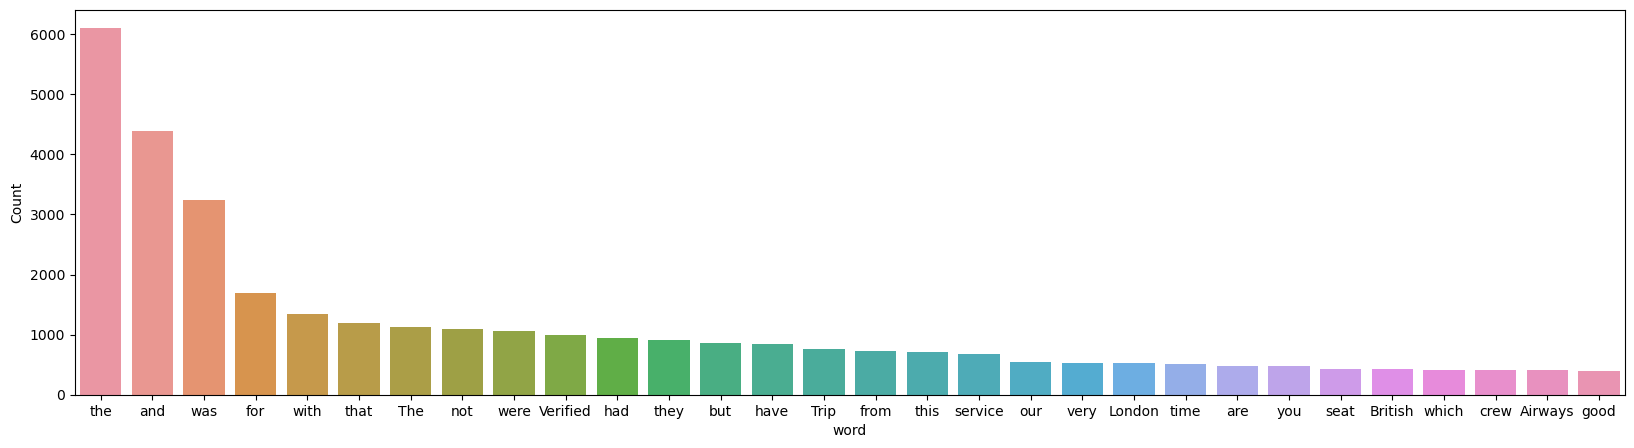

In [14]:

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = nltk.probability.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
    
freq_words(df["reviews"])
# this shoes us the most common words in the text which aren't that useful such as 'the' and 'a'

<>:4: DeprecationWarning: invalid escape sequence '\w'
<>:4: DeprecationWarning: invalid escape sequence '\w'
C:\Users\jconn\AppData\Local\Temp\ipykernel_17080\3194537465.py:4: DeprecationWarning: invalid escape sequence '\w'
  df["reviews"] = df['reviews'].str.replace('[^\w\s]','', regex = True)
C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

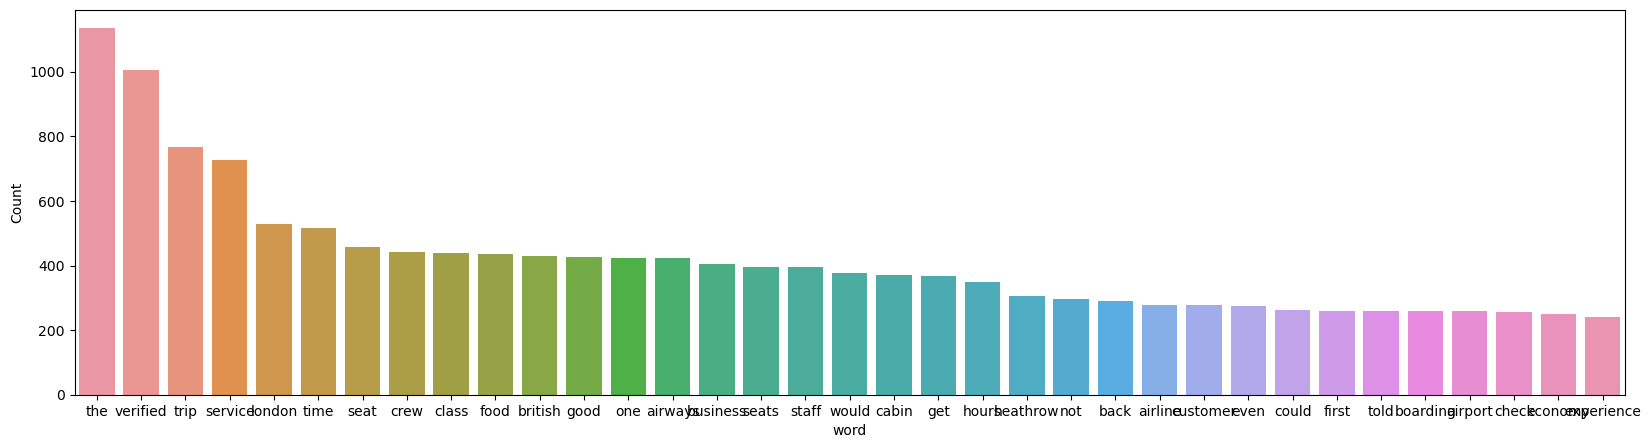

In [15]:
#Remove punctuation from our text
df['reviews'] = df['reviews'].astype(str)

df["reviews"] = df['reviews'].str.replace('[^\w\s]','', regex = True)
#Remove some words which are useless to draw conclusions from
df["reviews"] = df['reviews'].str.replace('trip','', regex = True)
df["reviews"] = df['reviews'].str.replace('flight','', regex = True)
stop_words = stopwords.words('english')

#function to remove frequent words used in all english texts
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviews']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

freq_words(reviews, 35)



C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jconn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


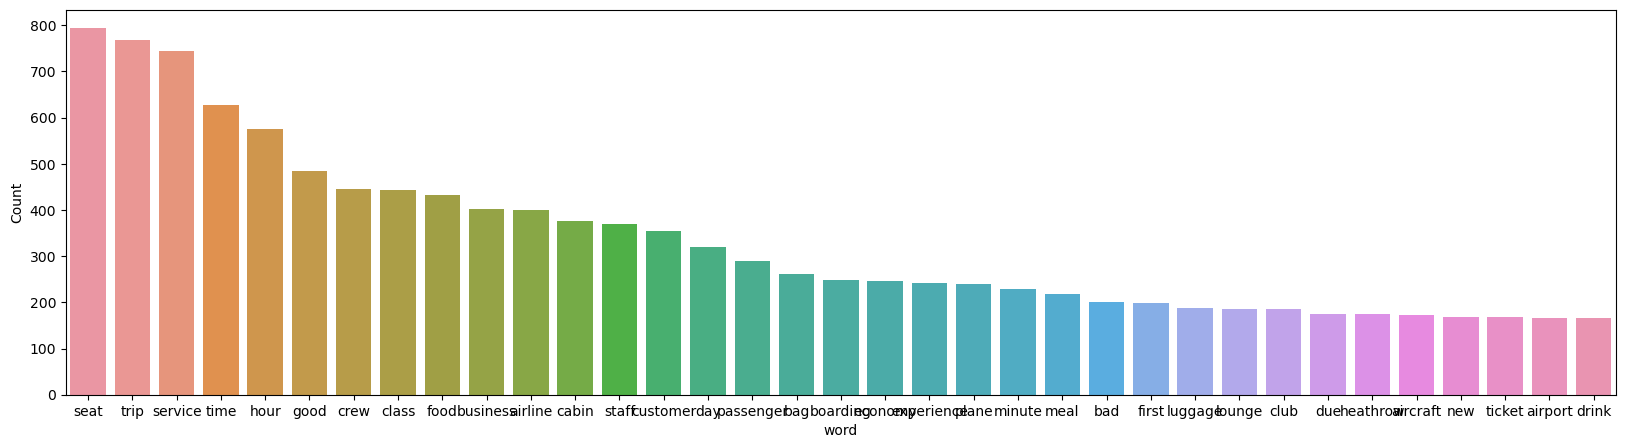

In [21]:
nlp = spacy.load('en_core_web_sm')


#Funciton to put words into root form
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
         doc = nlp(" ".join(sent)) 
         output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output


tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
#Apply function
reviews_2 = lemmatization(tokenized_reviews)

reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))


df['reviews'] = reviews_3

freq_words(df['reviews'], 35)






In [22]:
#Building an LDA model
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=12, random_state=100,
                chunksize=1000, passes=50)

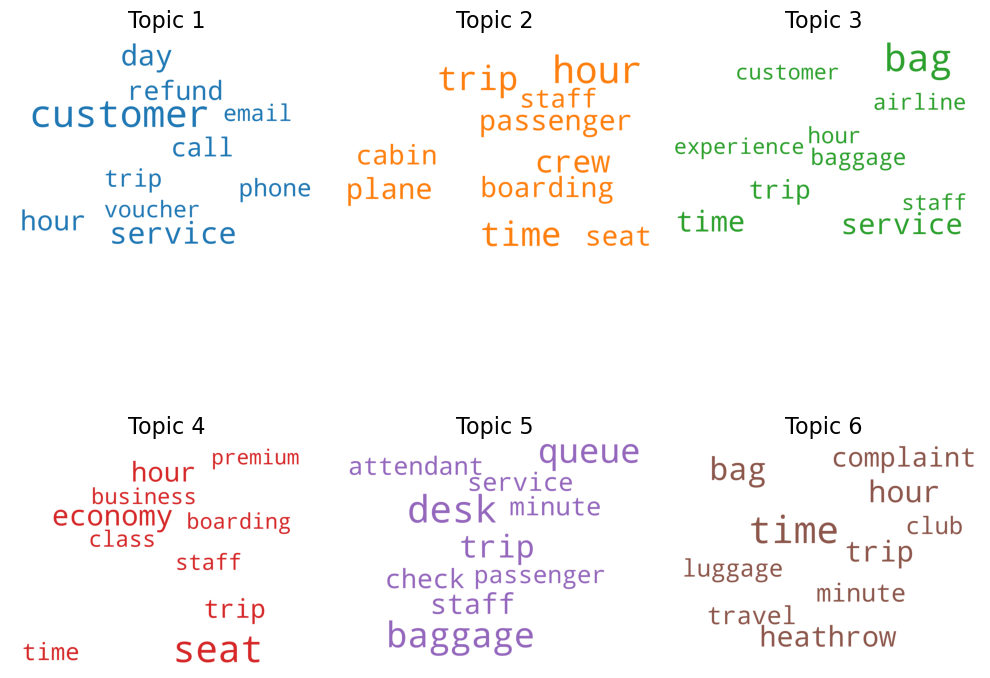

In [23]:
#Plot word clouds using LDA models
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()